(sec:planck)=
# Integrating the Planck function with python

Download this notebook from this link: [planck_function.ipynb](https://www.dropbox.com/scl/fi/0h4rc6v3zpfdffo6b2iim/planck_function.ipynb?rlkey=5oj4dxq7uabz84jwhgadpi3m6&st=lhui2utn&dl=0)

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Write a function to compute Stull 2.13

In [2]:
import numpy as np
#
# get Stull's c_1 and c_2 from fundamental constants
#
# c=2.99792458e+08  #m/s -- speed of light in vacuum
# h=6.62606876e-34  #J s  -- Planck's constant
# k=1.3806503e-23  # J/K  -- Boltzman's constant

c, h, k = 299_792_458.0, 6.626_070_04e-34, 1.380_648_52e-23
c1 = 2.0 * h * c ** 2.0
c2 = h * c / k
sigma = 2.0 * np.pi ** 5.0 * k ** 4.0 / (15 * h ** 3.0 * c ** 2.0)
print(f"in here is sigma {sigma}")


def Flambda(wavel, Temp):
    """
    Calculate the blackbody radiant exitence (Stull 2.13)

    Parameters
    ----------

      wavel: float or array
           wavelength (meters)

      Temp: float
           temperature (K)

    Returns
    -------

    Elambda:  float or arr
           monochromatic radiant exitence (W/m^2/m)
    """
    Flambda_val = c1 * np.pi / (wavel ** 5.0 * (np.exp(c2 / (wavel * Temp)) - 1))
    return Flambda_val

in here is sigma 5.670366816083269e-08


## run the function for a single temperature

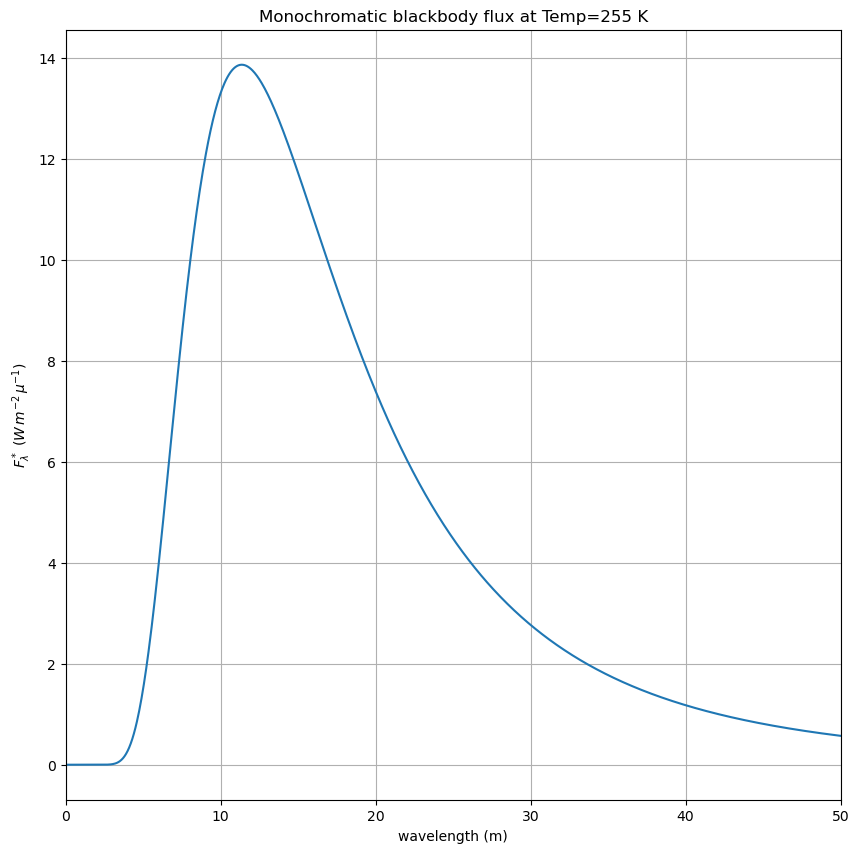

In [3]:
npoints = 10000
Temp = 255  # K
wavelengths = np.linspace(0.1, 500.0, npoints) * 1.0e-6  # meters
Fstar = Flambda(wavelengths, Temp)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#
#  change wavelength to microns and flux to W/m^2/micron
#
ax.plot(wavelengths * 1.0e6, Fstar * 1.0e-6)
ax.set(xlim=[0, 50])
ax.grid(True)
ax.set(
    xlabel="wavelength (m)",
    ylabel=r"$F_\lambda^*\ (W\,m^{-2}\,\mu^{-1}$)",
    title=f"Monochromatic blackbody flux at Temp={Temp} K",
);

## Convert flux to radiance

This uses the reading {ref}`week1-flux-from-radiance`

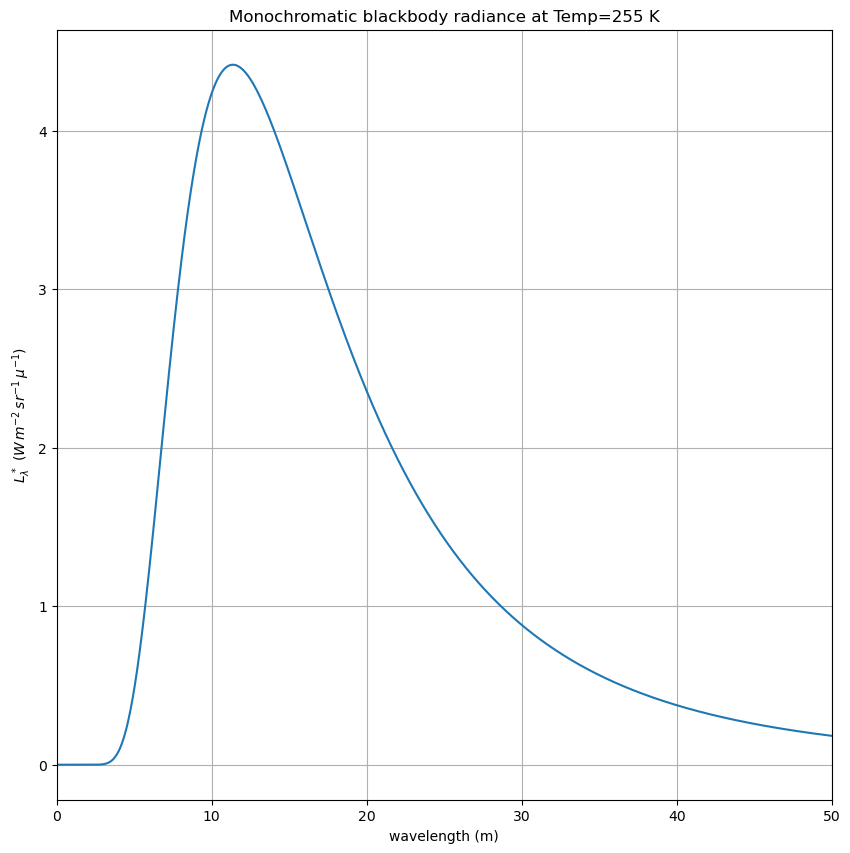

In [4]:
Lstar = Fstar / np.pi
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(wavelengths * 1.0e6, Lstar * 1.0e-6)
ax.set(xlim=[0, 50])
ax.grid(True)
ax.set(
    xlabel="wavelength (m)",
    ylabel="$L_\lambda^*\ (W\,m^{-2}\,sr^{-1}\,\mu^{-1}$)",
    title=f"Monochromatic blackbody radiance at Temp={Temp} K",
);

## Reproduce W&H figure 4.6

In the cell below add lines and change the axis limits to reproduce the high temperature emission spectrum in the W&H figure